<a href="https://colab.research.google.com/github/andrewsuh98/da-project-citibike/blob/eve/CitiBike_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/MyDrive/citibike_data"
os.makedirs(base_dir, exist_ok=True)
base_dir

'/content/drive/MyDrive/citibike_data'

In [ ]:
import os
import requests

# Folder where files will be stored (we used base_dir above)
base_dir = "/content/drive/MyDrive/citibike_data"
os.makedirs(base_dir, exist_ok=True)

# -------------------------------
# Choose which years and months
# -------------------------------
# Example: all months of 2024 and 2025
years = [2024, 2025]
months = [f"{m:02d}" for m in range(1, 13)]  # "01".."12"

# -------------------------------
# Download helper
# -------------------------------
def download_month(year, month):
    """
    Try common Citi Bike filename patterns for a given year-month.
    """
    patterns = [
        f"{year}{month}-citibike-tripdata.csv.zip",
        f"{year}{month}-citibike-tripdata.zip",
        f"{year}{month}-citibike-tripdata.csv",
        f"{year}{month}-citibike-tripdata",  # rare, fallback
    ]

    base_url = "https://s3.amazonaws.com/tripdata/"

    for filename in patterns:
        url = base_url + filename
        save_path = os.path.join(base_dir, filename)

        print(f"Trying: {url}")
        r = requests.get(url)

        if r.status_code == 200:
            print(f"✔ Downloaded: {filename}")
            with open(save_path, "wb") as f:
                f.write(r.content)
            return True
        else:
            print(f"✖ Not found: {filename}")

    print(f"⚠ No file found for {year}-{month}. Skipping.\n")
    return False

# -------------------------------
# Run downloads
# -------------------------------
for y in years:
    for m in months:
        print(f"\n=== {y}-{m} ===")
        download_month(y, m)


=== 2024-01 ===
Trying: https://s3.amazonaws.com/tripdata/202401-citibike-tripdata.csv.zip
✖ Not found: 202401-citibike-tripdata.csv.zip
Trying: https://s3.amazonaws.com/tripdata/202401-citibike-tripdata.zip
✔ Downloaded: 202401-citibike-tripdata.zip

=== 2024-02 ===
Trying: https://s3.amazonaws.com/tripdata/202402-citibike-tripdata.csv.zip
✖ Not found: 202402-citibike-tripdata.csv.zip
Trying: https://s3.amazonaws.com/tripdata/202402-citibike-tripdata.zip
✔ Downloaded: 202402-citibike-tripdata.zip

=== 2024-03 ===
Trying: https://s3.amazonaws.com/tripdata/202403-citibike-tripdata.csv.zip
✖ Not found: 202403-citibike-tripdata.csv.zip
Trying: https://s3.amazonaws.com/tripdata/202403-citibike-tripdata.zip
✔ Downloaded: 202403-citibike-tripdata.zip

=== 2024-04 ===
Trying: https://s3.amazonaws.com/tripdata/202404-citibike-tripdata.csv.zip
✖ Not found: 202404-citibike-tripdata.csv.zip
Trying: https://s3.amazonaws.com/tripdata/202404-citibike-tripdata.zip
✔ Downloaded: 202404-citibike-tripd

In [ ]:
import zipfile
import glob

zip_files = glob.glob(base_dir + "/*.zip")
zip_files

['/content/drive/MyDrive/citibike_data/202401-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202402-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202403-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202404-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202405-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202406-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202407-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202408-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202409-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202410-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202411-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202412-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202501-citibike-tripdata.zip',
 '/content/drive/MyDrive/citibike_data/202502-citibike-tripdata.zip',
 '/content/drive/MyD

In [ ]:
for zf in zip_files:
    with zipfile.ZipFile(zf, 'r') as z:
        z.extractall(base_dir)

In [ ]:
import pandas as pd
import glob

csv_files = glob.glob(base_dir + "/*.csv")
len(csv_files), csv_files[:3]

df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
df.head()

/tmp/ipython-input-689458783.py:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
/tmp/ipython-input-689458783.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
/tmp/ipython-input-689458783.py:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
/tmp/ipython-input-689458783.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
/tmp/ipython-input-689458783.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv

KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/citibike_data/202408-citibike-tripdata_1.csv")
df.head()

/tmp/ipython-input-950078931.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/citibike_data/202408-citibike-tripdata_1.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual


In [ ]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [ ]:
df["start_station_id"] = df["start_station_id"].astype(str)
df["end_station_id"]   = df["end_station_id"].astype(str)

station_id = "5905.14"   # match what you saw in value_counts

df_station_arrivals = df[df["end_station_id"] == station_id]
df_station_deps     = df[df["start_station_id"] == station_id]

In [ ]:
arr_hourly = (
    df_station_arrivals["ended_at"]
    .dt.hour
    .value_counts()
    .sort_index()
)

dep_hourly = (
    df_station_deps["started_at"]
    .dt.hour
    .value_counts()
    .sort_index()
)

arr_hourly, dep_hourly

(ended_at
 0      84
 1      27
 2      22
 3       7
 4      35
 5      67
 6     162
 7     201
 8     288
 9     404
 10    278
 11    316
 12    348
 13    394
 14    400
 15    364
 16    425
 17    515
 18    472
 19    327
 20    281
 21    181
 22    112
 23    109
 Name: count, dtype: int64,
 started_at
 0      35
 1      17
 2       6
 3      10
 4       5
 5      23
 6      50
 7     104
 8     157
 9     171
 10    158
 11    144
 12    181
 13    223
 14    183
 15    182
 16    217
 17    259
 18    222
 19    198
 20    136
 21    108
 22     95
 23     51
 Name: count, dtype: int64)

In [ ]:
p_arrive = (arr_hourly > 0).mean()
p_depart = (dep_hourly > 0).mean()


p_arrive, p_depart

(np.float64(1.0), np.float64(1.0))

In [ ]:
import numpy as np
rng = np.random.default_rng(20)

def simulate_station_bernoulli(N_start, p_depart, p_arrive, max_hours=24*7):
    """
    N_start : starting bikes
    p_depart: prob. at least one departure in an hour
    p_arrive: prob. at least one arrival in an hour
    Returns: hours until station hits 0 bikes (stockout),
             or max_hours if it never hits 0.
    """
    N = N_start
    t = 0  # hours

    while t < max_hours:
        t += 1

        # 1) departures (rentals)
        if rng.random() < p_depart and N > 0:
            N -= 1

        # if empty → stockout
        if N == 0:
            break

        # 2) arrivals (returns)
        if rng.random() < p_arrive:
            N += 1

    return t

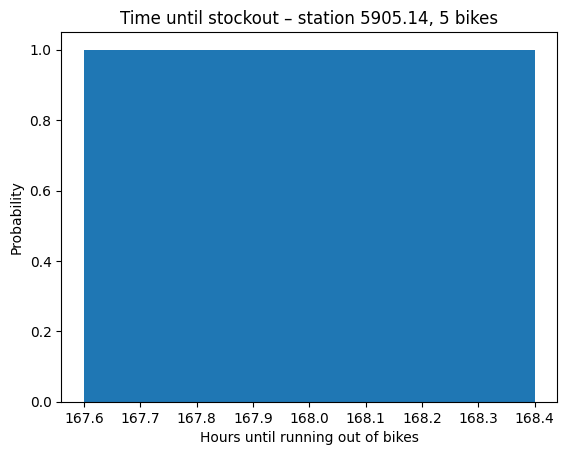

np.float64(168.0)

In [ ]:
import matplotlib.pyplot as plt

def run_experiment_bernoulli(N_start, num_runs=10000):
    samples = [simulate_station_bernoulli(N_start, p_depart, p_arrive)
               for _ in range(num_runs)]
    samples = np.array(samples)
    return samples

# Example: start with 5 bikes
samples_5 = run_experiment_bernoulli(5)

# Histogram
X_v, C_v = np.unique(samples_5, return_counts=True)
plt.bar(X_v, C_v / C_v.sum())
plt.xlabel("Hours until running out of bikes")
plt.ylabel("Probability")
plt.title(f"Time until stockout – station {station_id}, {5} bikes")
plt.show()

# Average time before stockout
samples_5.mean()

poisson

In [ ]:
# counts per hour (already have these)
arr_hourly = (
    df_station_arrivals["ended_at"]
    .dt.hour.value_counts()
    .sort_index()
)
dep_hourly = (
    df_station_deps["started_at"]
    .dt.hour.value_counts()
    .sort_index()
)

# average *number of trips* per hour
lambda_arr = arr_hourly.mean()
lambda_dep = dep_hourly.mean()

lambda_arr, lambda_dep

(np.float64(242.45833333333334), np.float64(122.29166666666667))

In [ ]:
# how many distinct days are in this month of data?
num_days = df["started_at"].dt.normalize().nunique()

# arrival / departure rates per hour (not per month)
lambda_arr = arr_hourly.mean() / num_days
lambda_dep = dep_hourly.mean() / num_days

lambda_arr, lambda_dep, num_days

(np.float64(16.163888888888888), np.float64(8.152777777777779), 15)

In [ ]:
import numpy as np

rng = np.random.default_rng(20)

def simulate_station_poisson(N_start, lambda_dep, lambda_arr, max_hours=24*3, capacity=None):
    """
    N_start  : initial number of bikes
    lambda_dep : avg # of departures per hour
    lambda_arr : avg # of arrivals per hour
    capacity   : max number of bikes the station can hold (docks).
                 If None, treat as unlimited.
    returns: hours until stockout (N hits 0) or max_hours if it never hits 0
    """
    N = N_start
    t = 0

    while t < max_hours and N > 0:
        t += 1

        # departures (rentals)
        d = rng.poisson(lambda_dep)
        d = min(d, N)   # can't rent more bikes than we have
        N -= d

        if N == 0:
            break

        # arrivals (returns)
        a = rng.poisson(lambda_arr)
        N += a

        if capacity is not None:
            N = min(N, capacity)

    return t

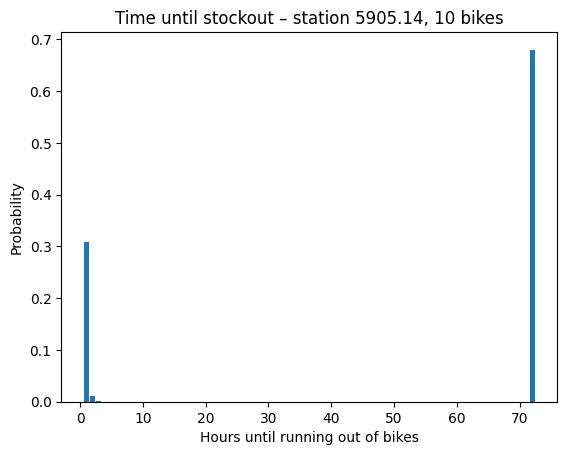

np.float64(49.2793)

In [ ]:
N_start = 10   # initial bikes at this station
capacity = 30    # just pick a reasonable dock capacity for now

samples_5 = [simulate_station_poisson(N_start, lambda_dep, lambda_arr, max_hours=24*3, capacity=capacity)
             for _ in range(10000)]

# distribution
X_v, C_v = np.unique(samples_5, return_counts=True)

import matplotlib.pyplot as plt

plt.bar(X_v, C_v / C_v.sum())
plt.xlabel("Hours until running out of bikes")
plt.ylabel("Probability")
plt.title(f"Time until stockout – station {station_id}, {N_start} bikes")
plt.show()

# average time before stockout
np.mean(samples_5)

exponential distribution

In [ ]:
import numpy as np
rng = np.random.default_rng(20)

def simulate_station_exponential(N_start, lambda_dep, lambda_arr, max_time=24*7):
    """
    Continuous-time simulation using exponential interarrival times.
    N_start     : initial number of bikes
    lambda_dep  : expected departures (rentals) per hour
    lambda_arr  : expected arrivals (returns) per hour
    max_time    : safety cap
    returns: time until station empties
    """
    N = N_start
    t = 0.0  # continuous time in hours

    while N > 0 and t < max_time:

        # generate next event times
        t_dep = rng.exponential(1 / lambda_dep) if lambda_dep > 0 else np.inf
        t_arr = rng.exponential(1 / lambda_arr) if lambda_arr > 0 else np.inf

        # next event is whichever is smaller
        dt = min(t_dep, t_arr)
        t += dt

        # which event occurs?
        if t_dep < t_arr:
            # departure event (rental)
            if N > 0:
                N -= 1
        else:
            # arrival event (return)
            N += 1

    return t

In [ ]:
def run_experiment_exp(N_start, n_runs=5000):
    return np.array([
        simulate_station_exponential(N_start, lambda_dep, lambda_arr)
        for _ in range(n_runs)
    ])

In [ ]:
samples_10 = run_experiment_exp(10)
samples_10.mean()

np.float64(167.84054424941868)

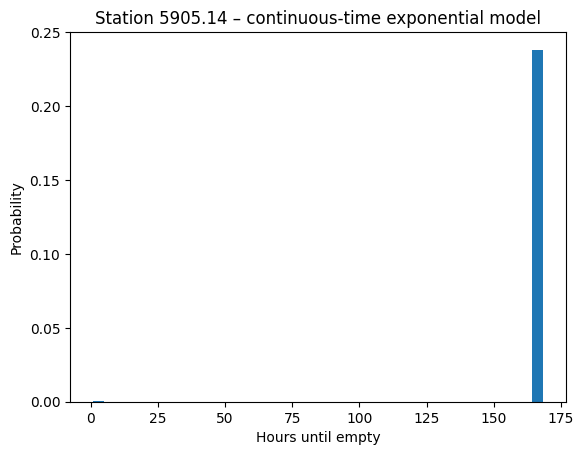

In [ ]:
plt.hist(samples_10, bins=40, density=True)
plt.xlabel("Hours until empty")
plt.ylabel("Probability")
plt.title(f"Station {station_id} – continuous-time exponential model")
plt.show()

prob that it will become full

In [ ]:
capacity = 3645  # example; replace with real dock count from CitiBike API

In [ ]:
rng = np.random.default_rng(20)

def simulate_station_full_empty(N_start, lambda_dep, lambda_arr, capacity, max_time=24*7):
    """
    N_start    : initial bikes
    lambda_dep : expected departures per hour
    lambda_arr : expected arrivals per hour
    capacity   : total number of docks (max bikes allowed)
    max_time   : safety cutoff

    Returns:
      t           : time until hitting empty OR full
      status      : 'empty' or 'full'
    """

    N = N_start
    t = 0.0

    # avoid zero-rate issues
    lam_dep = lambda_dep if lambda_dep > 0 else 1e-12
    lam_arr = lambda_arr if lambda_arr > 0 else 1e-12

    while 0 < N < capacity and t < max_time:

        t_dep = rng.exponential(1 / lam_dep)   # time to next rental
        t_arr = rng.exponential(1 / lam_arr)   # time to next return

        dt = min(t_dep, t_arr)
        t += dt

        if t_dep < t_arr:
            # rental event
            if N > 0:
                N -= 1
        else:
            # return event
            if N < capacity:
                N += 1

    # decide which boundary
    if N == 0:
        return t, "empty"
    elif N == capacity:
        return t, "full"
    else:
        return t, "none"   # timed out (rare)

In [ ]:
def run_experiment_full_empty(N_start, lambda_dep, lambda_arr, capacity, num_runs=5000):
    times = []
    status = []

    for _ in range(num_runs):
        t, s = simulate_station_full_empty(N_start, lambda_dep, lambda_arr, capacity)
        times.append(t)
        status.append(s)

    return np.array(times), np.array(status)

In [ ]:
N_start = 10         # starting bikes
capacity = 50        # example, change to real value

times, status = run_experiment_full_empty(
    N_start,
    lambda_dep,
    lambda_arr,
    capacity,
    num_runs=5000
)

In [ ]:
p_empty = np.mean(status == "empty")
p_full  = np.mean(status == "full")

p_empty, p_full

(np.float64(0.0006), np.float64(0.9994))

In [ ]:
time_until_empty = times[status=="empty"].mean() if p_empty > 0 else None
time_until_full  = times[status=="full"].mean()  if p_full  > 0 else None

time_until_empty, time_until_full

(np.float64(0.999683556352136), np.float64(5.000871049780431))

In [ ]:
df["start_station_id"].value_counts().head(20)

,count
start_station_id,
5788.13,3645
5329.03,3443
6726.01,3199
5905.12,3000
6331.01,2998
5905.14,2935
6140.05,2920
6948.10,2873
6450.05,2847


In [ ]:
df["start_station_name"].value_counts().head(20)

,count
start_station_name,
Lafayette St & E 8 St,3645
West St & Chambers St,3443
11 Ave & W 41 St,3199
Broadway & E 14 St,3000
W 31 St & 7 Ave,2998
University Pl & E 14 St,2935
W 21 St & 6 Ave,2920
Broadway & W 58 St,2873
8 Ave & W 31 St,2847
